In [536]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

RANDOM_SEED = 42

In [537]:
df = pd.read_csv("./data/Ana_Health-Tabela_Modelo_Previsao_Churn.csv",skiprows=1)
df

,id_person,birthdate,id_gender,id_marrital_status,state,city,postal_code,id_health_plan,id_person_recommendation,contract_start_date,...,Ligações Outbound,Data Última Ligações Outbound,Qde Total de Faturas,Qde Total de Tentativas de Cobrança,Método de Pagamento,Valor Médio da Mensalidade,Qde Total de Faturas Pagas após Vencimento,Qde Total de Faturas Inadimpletes,Valor Total Inadimplência,Qde Perfis de Pagamento Inativos
0,250,1971-04-01,64.0,82.0,São Paulo,São Paulo,04534-020,417.0,NaN,2021-01-28,...,2.0,2022-04-25 19:18:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,254,NaN,NaN,NaN,North Carolina,Mecklenburg County,28203,NaN,NaN,2020-12-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,314,1985-08-01,NaN,NaN,São Paulo,São Paulo,05337-030,NaN,NaN,2021-01-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,317,1986-10-14,NaN,NaN,São Paulo,São Paulo,05421-050,NaN,NaN,2021-01-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,5948,1990-08-13,64.0,80.0,Bahia,Salvador,41830-120,NaN,NaN,2023-11-07,...,NaN,NaN,1.0,1.0,Cartão de crédito,50.0,0.0,0.0,0.0,False
1198,5949,1997-04-17,64.0,80.0,São Paulo,São Paulo,05014-001,NaN,NaN,2023-11-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1199,5951,1973-10-20,111.0,83.0,São Paulo,São Paulo,04883-190,412.0,NaN,2023-10-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1200,5954,1970-08-14,63.0,82.0,São Paulo,São Paulo,04513-100,NaN,NaN,2023-11-07,...,NaN,NaN,1.0,1.0,Cartão de crédito,120.0,0.0,0.0,0.0,False


In [538]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 75 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id_person                                   1202 non-null   int64  
 1   birthdate                                   1191 non-null   object 
 2   id_gender                                   1178 non-null   float64
 3   id_marrital_status                          1178 non-null   float64
 4   state                                       1185 non-null   object 
 5   city                                        1183 non-null   object 
 6   postal_code                                 1163 non-null   object 
 7   id_health_plan                              524 non-null    float64
 8   id_person_recommendation                    110 non-null    float64
 9   contract_start_date                         1202 non-null   object 
 10  contract_end

In [539]:
df.describe()

,id_person,id_gender,id_marrital_status,id_health_plan,id_person_recommendation,id_continuity_pf,Canal de Preferência,notes_count,done_activities_count,id_label,...,Mensagens Inbound,Mensagens Outbound,Ligações Inbound,Ligações Outbound,Qde Total de Faturas,Qde Total de Tentativas de Cobrança,Valor Médio da Mensalidade,Qde Total de Faturas Pagas após Vencimento,Qde Total de Faturas Inadimpletes,Valor Total Inadimplência
count,1202.000000,1178.000000,1178.000000,524.000000,110.000000,395.000000,384.000000,1202.000000,1202.000000,103.000000,...,1091.000000,1158.000000,118.000000,579.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,3484.637271,63.729202,80.619694,417.921756,2555.736364,338.878481,244.635417,1.182196,10.122296,317.135922,...,75.735105,83.278066,3.144068,2.861831,6.325397,8.714286,94.484683,0.880952,0.250000,24.182738
std,1468.065478,3.353515,0.977062,129.712462,1213.154949,0.327144,25.618050,1.908197,8.938732,11.220647,...,104.519681,98.981933,8.482537,8.430147,4.803434,7.736556,32.399305,1.536318,0.821159,76.092674
min,250.000000,63.000000,80.000000,78.000000,321.000000,338.000000,238.000000,0.000000,0.000000,284.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,50.000000,0.000000,0.000000,0.000000
25%,2399.250000,63.000000,80.000000,412.000000,1510.000000,339.000000,239.000000,0.000000,5.000000,313.000000,...,13.000000,19.000000,1.000000,1.000000,3.000000,3.000000,78.000000,0.000000,0.000000,0.000000
50%,3281.500000,64.000000,80.000000,412.000000,2379.000000,339.000000,239.000000,1.000000,8.000000,325.000000,...,40.000000,50.000000,1.000000,2.000000,5.000000,7.000000,88.000000,0.000000,0.000000,0.000000
75%,5114.750000,64.000000,82.000000,419.500000,3347.500000,339.000000,239.000000,2.000000,13.000000,325.000000,...,96.500000,110.000000,2.000000,3.000000,9.000000,12.000000,111.100000,1.000000,0.000000,0.000000
max,5956.000000,117.000000,83.000000,1164.000000,5556.000000,339.000000,360.000000,31.000000,137.000000,325.000000,...,1436.000000,1230.000000,80.000000,197.000000,30.000000,41.000000,383.750000,9.000000,7.000000,616.000000


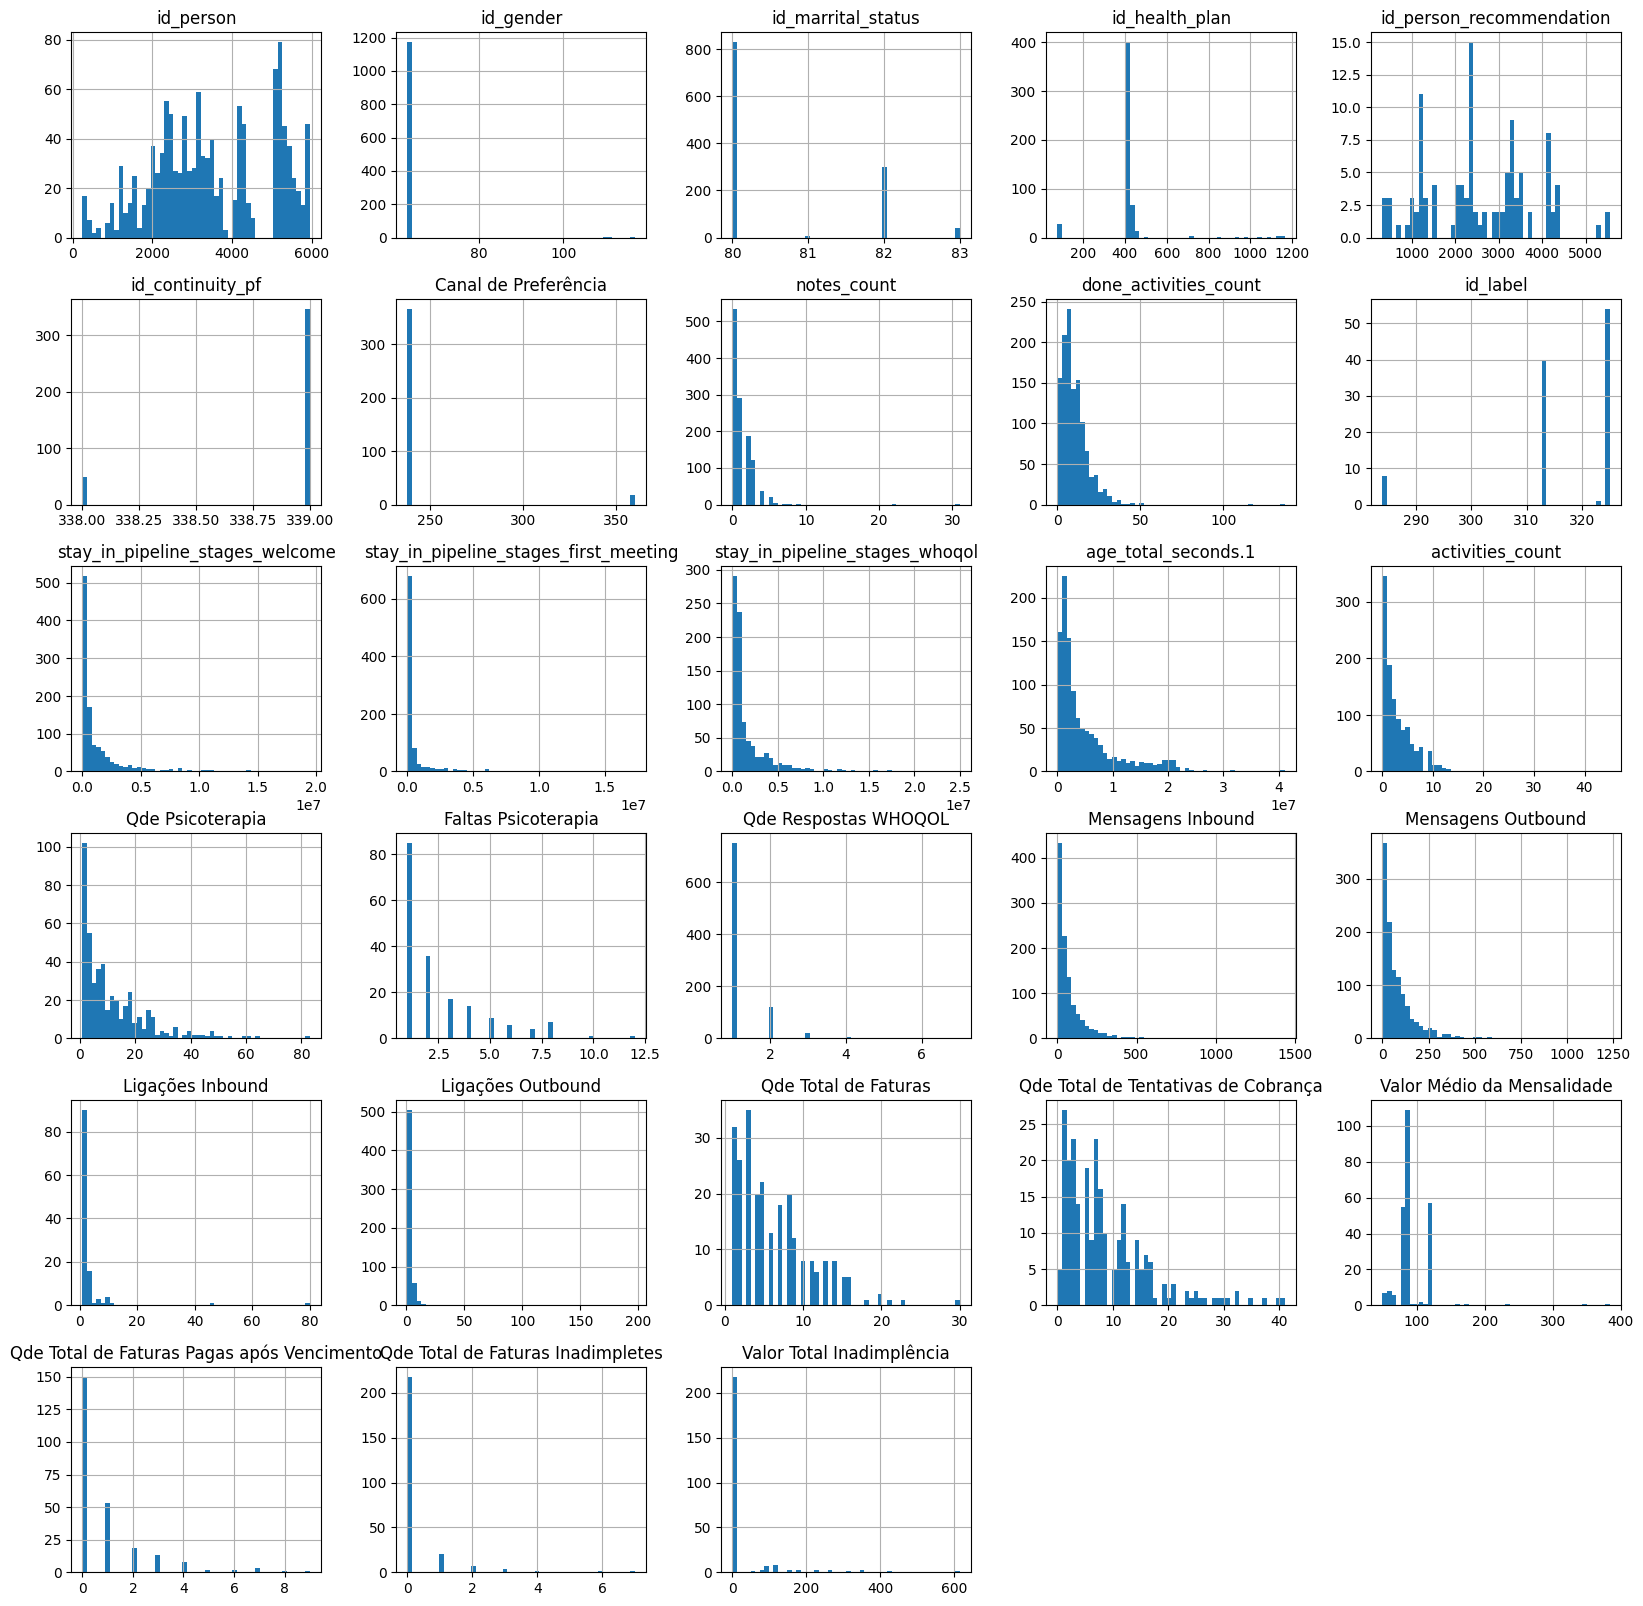

In [540]:
df.hist(bins=50, figsize=(20,20))
plt.show()

Verificando valores faltantes

In [541]:
columns = ['Qde Prescrições', 'Ligações Outbound', 'Datas Acolhimento', 'id_stage', 'Data Última Mensagens Inbound', 'Faltas Atendimento Médico', 
           'Pontos de Atenção', 'activities_count', 'Recebe Comunicados?', 'Qde Total de Faturas', 'Data Última Ligações Inbound', 'id_gender']

df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Qde Prescrições                1202 non-null   bool   
 1   Ligações Outbound              579 non-null    float64
 2   Datas Acolhimento              1202 non-null   bool   
 3   id_stage                       1079 non-null   object 
 4   Data Última Mensagens Inbound  1091 non-null   object 
 5   Faltas Atendimento Médico      1202 non-null   bool   
 6   Pontos de Atenção              62 non-null     object 
 7   activities_count               1116 non-null   float64
 8   Recebe Comunicados?            62 non-null     object 
 9   Qde Total de Faturas           252 non-null    float64
 10  Data Última Ligações Inbound   118 non-null    object 
 11  id_gender                      1178 non-null   float64
dtypes: bool(3), float64(4), object(5)
memory usage: 

array([[<AxesSubplot: title={'center': 'Ligações Outbound'}>,
        <AxesSubplot: title={'center': 'activities_count'}>],
       [<AxesSubplot: title={'center': 'Qde Total de Faturas'}>,
        <AxesSubplot: title={'center': 'id_gender'}>]], dtype=object)

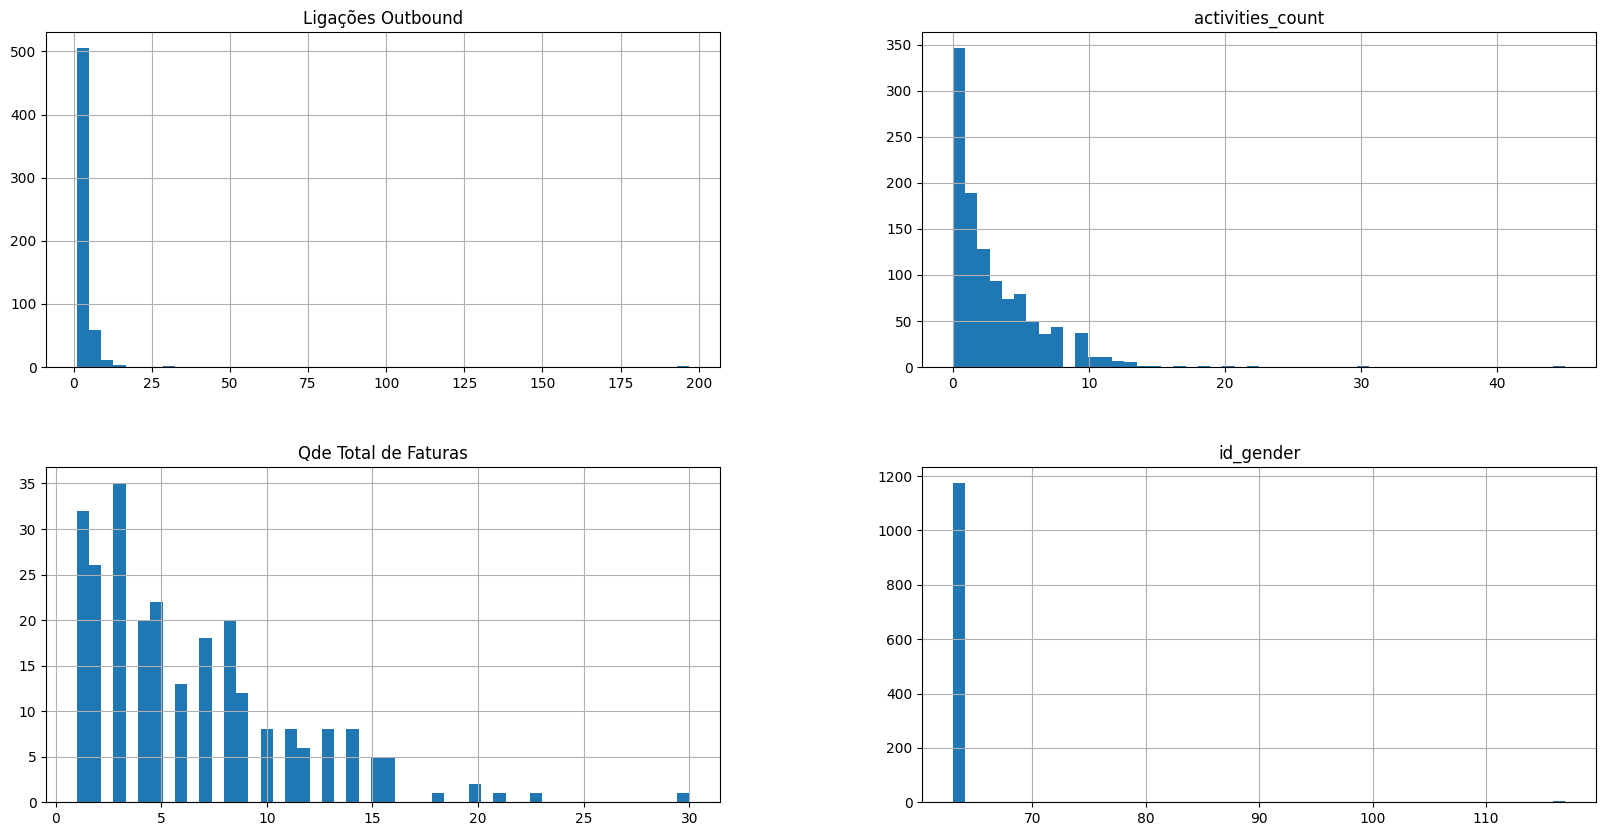

In [542]:
df[columns].hist(bins=50, figsize=(20,10))

# Variáveis Numéricas

## Ligações Outbound

#### Contagem de ligações feitas pela equipe de saúde

Tirando os NANs

In [543]:
ligacoes_outbound = df['Ligações Outbound']

print(f"Quantidade de ligações (com NaN): {len(ligacoes_outbound)}")

ligacoes_outbound = ligacoes_outbound.dropna()

print(f"Quantidade de ligações (sem NaN): {len(ligacoes_outbound)}")

Quantidade de ligações (com NaN): 1202
Quantidade de ligações (sem NaN): 579


In [544]:
vc = ligacoes_outbound.value_counts()
vc

1.0      240
2.0      145
3.0       81
4.0       39
5.0       22
6.0       20
7.0       12
9.0        5
8.0        4
10.0       3
12.0       2
14.0       2
11.0       1
197.0      1
16.0       1
31.0       1
Name: Ligações Outbound, dtype: int64

In [545]:
print(vc.index) # vc.index = qtd de ligações
print(vc.values) # vc.values = qtd de registros com a qtd de ligações

Float64Index([  1.0,   2.0,   3.0,   4.0,   5.0,   6.0,   7.0,   9.0,   8.0,
               10.0,  12.0,  14.0,  11.0, 197.0,  16.0,  31.0],
             dtype='float64')
[240 145  81  39  22  20  12   5   4   3   2   2   1   1   1   1]


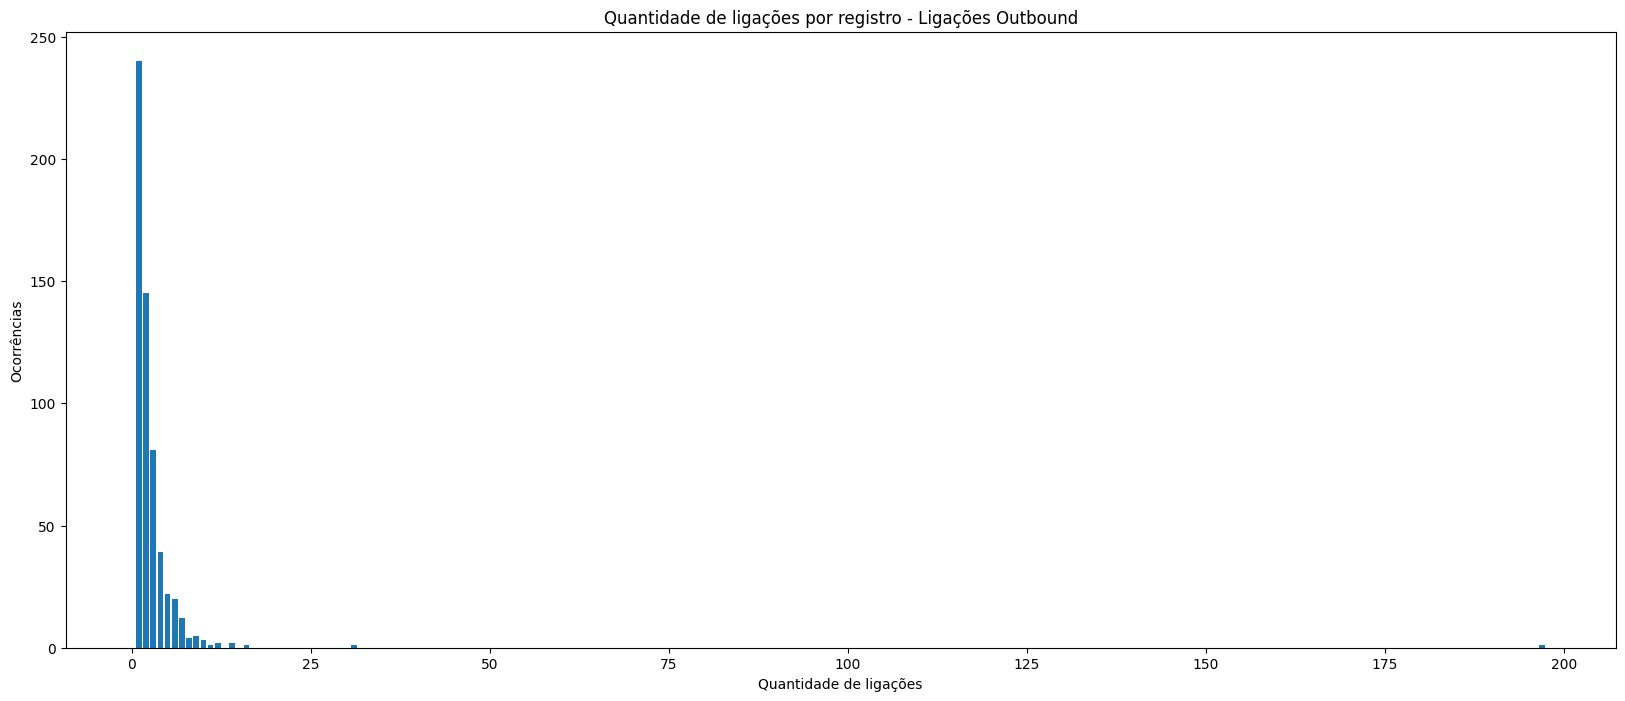

In [546]:
plt.figure(figsize=(20,8))
plt.bar(vc.index, vc.values) 
plt.xlabel('Quantidade de ligações')
plt.ylabel('Ocorrências')
plt.title('Quantidade de ligações por registro - Ligações Outbound')
plt.show()

## activities_count

#### Contagem de atividades relacionadas ao processo de onboarding


In [547]:
activities_count = df['activities_count']
print(f"Quantidade de atividades (com NaN): {len(activities_count)}")
activities_count = activities_count.dropna()
print(f"Quantidade de atividades (sem NaN): {len(activities_count)}")

Quantidade de atividades (com NaN): 1202
Quantidade de atividades (sem NaN): 1116


In [548]:

vc = activities_count.value_counts()
vc

0.0     346
1.0     189
2.0     128
3.0      93
5.0      79
4.0      74
6.0      49
8.0      43
9.0      37
7.0      36
11.0     11
10.0     11
12.0      7
13.0      5
45.0      1
15.0      1
22.0      1
17.0      1
30.0      1
20.0      1
18.0      1
14.0      1
Name: activities_count, dtype: int64

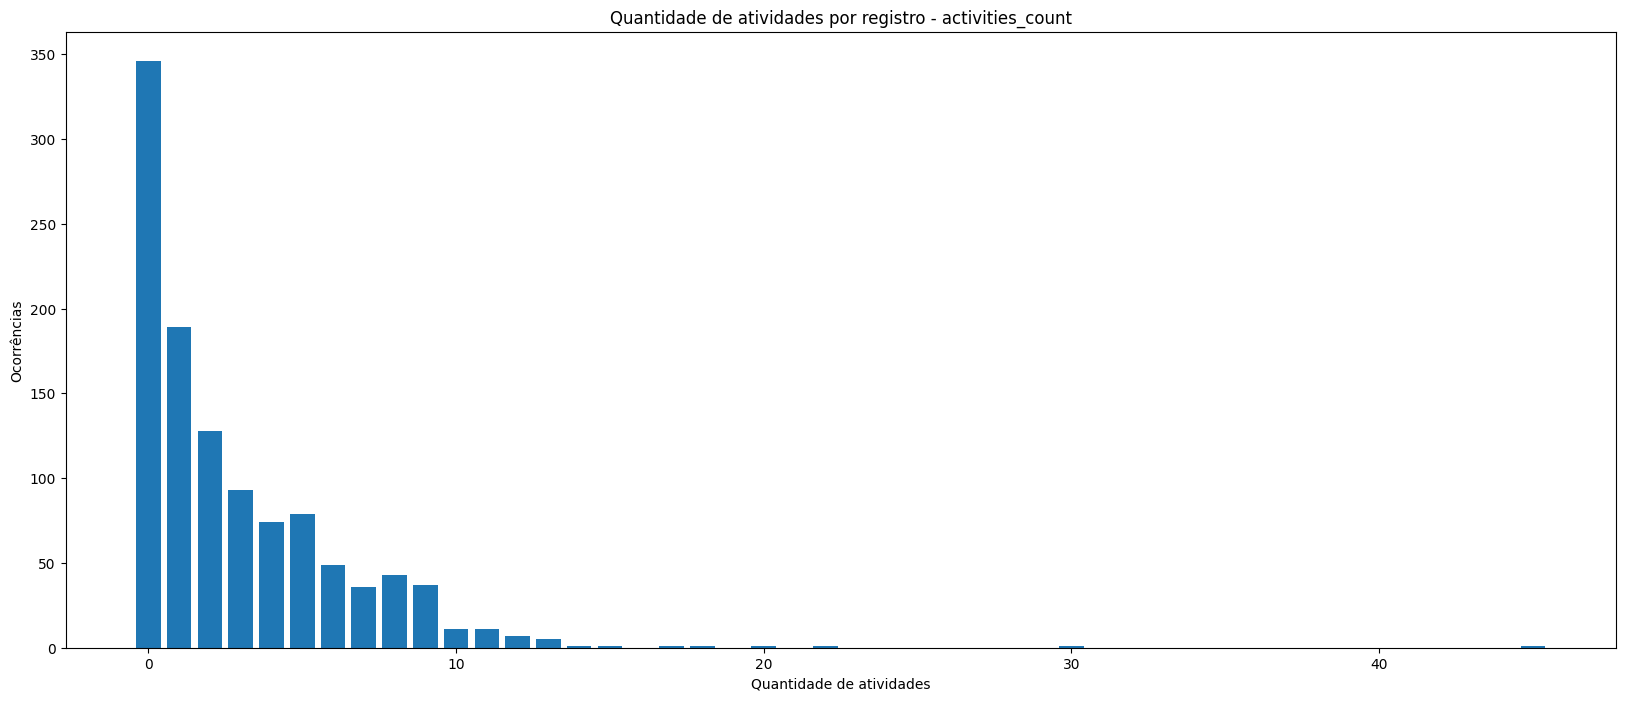

In [549]:
plt.figure(figsize=(20,8))
plt.bar(vc.index, vc.values)
plt.xlabel('Quantidade de atividades')
plt.ylabel('Ocorrências')
plt.title('Quantidade de atividades por registro - activities_count')
plt.show()

## Qde Total de Faturas

#### Contagem de atividades relacionadas ao processo de onboarding


In [550]:
qde_total_faturas = df['Qde Total de Faturas']
print(f"Quantidade total de faturas (com NaN): {len(qde_total_faturas)}")
qde_total_faturas = qde_total_faturas.dropna()
print(f"Quantidade total de faturas (sem NaN): {len(qde_total_faturas)}")

Quantidade total de faturas (com NaN): 1202
Quantidade total de faturas (sem NaN): 252


In [551]:
vc = qde_total_faturas.value_counts()
vc

3.0     35
1.0     32
2.0     26
5.0     22
8.0     20
4.0     20
7.0     18
6.0     13
9.0     12
10.0     8
11.0     8
13.0     8
14.0     8
12.0     6
16.0     5
15.0     5
20.0     2
21.0     1
23.0     1
18.0     1
30.0     1
Name: Qde Total de Faturas, dtype: int64

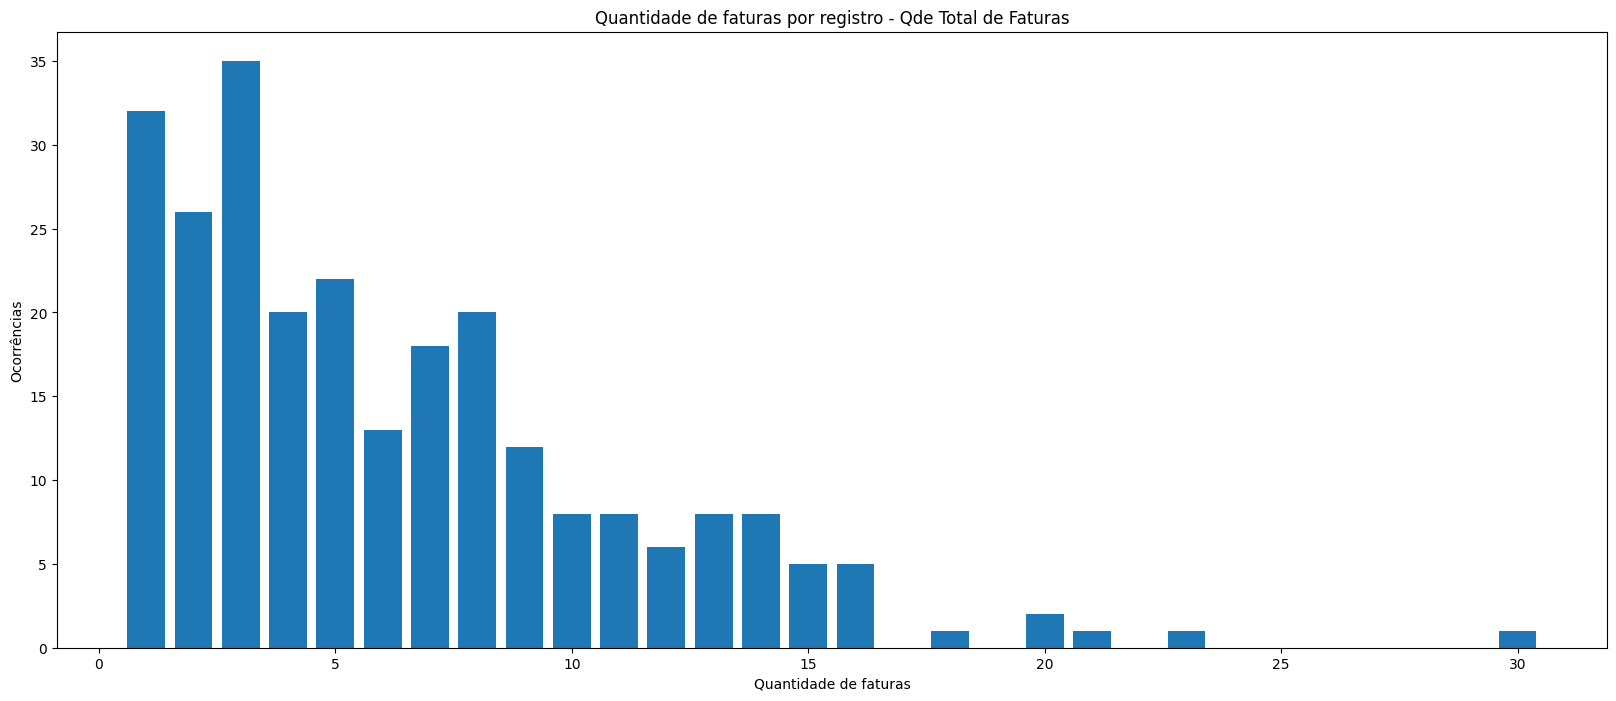

In [552]:
plt.figure(figsize=(20,8))
plt.bar(vc.index, vc.values)
plt.xlabel('Quantidade de faturas')
plt.ylabel('Ocorrências')
plt.title('Quantidade de faturas por registro - Qde Total de Faturas')

plt.show()

## Correlação entre as features numéricas

In [553]:
df_corr = df[columns].drop(['Datas Acolhimento', 'Faltas Atendimento Médico', 'Qde Prescrições'], axis=1)
corr_matrix = df_corr.corr()
corr_matrix

C:\Users\Asus\AppData\Local\Temp\ipykernel_5684\2798395808.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_corr.corr()


,Ligações Outbound,activities_count,Qde Total de Faturas,id_gender
Ligações Outbound,1.000000,0.009544,0.286932,-0.014417
activities_count,0.009544,1.000000,0.077818,-0.019529
Qde Total de Faturas,0.286932,0.077818,1.000000,0.046366
id_gender,-0.014417,-0.019529,0.046366,1.000000


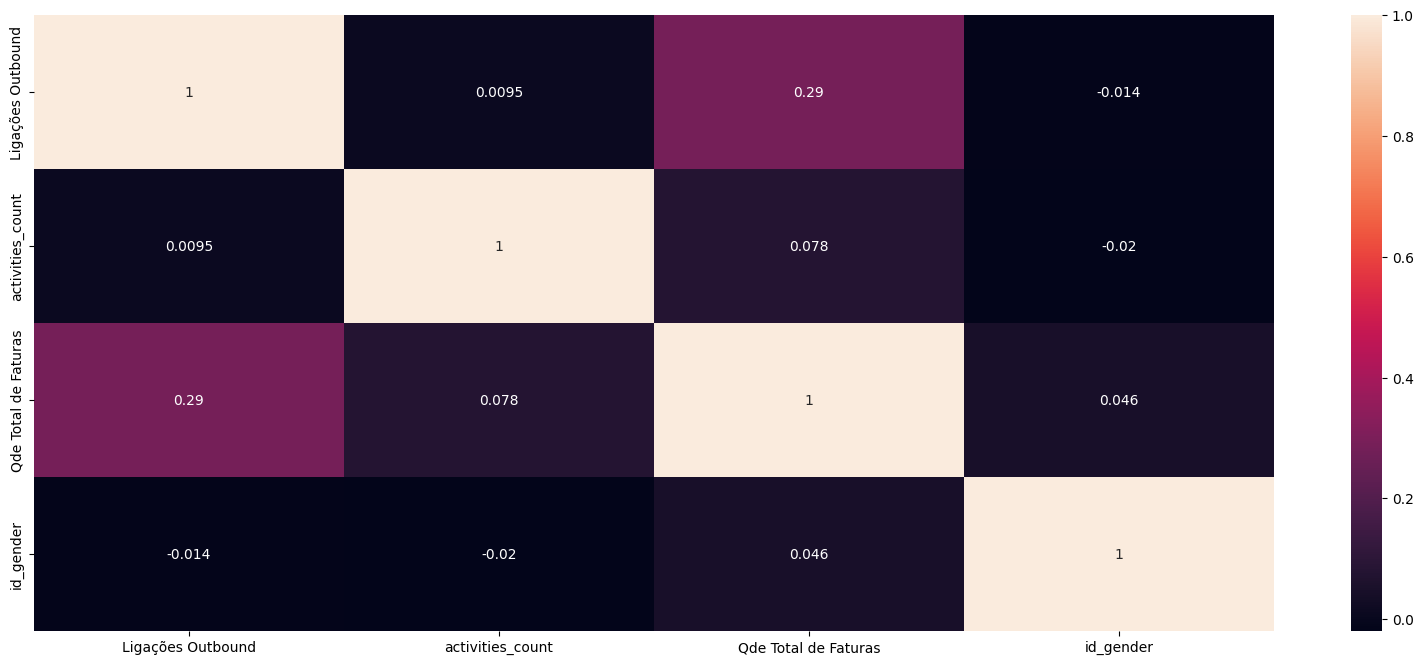

In [554]:
plt.figure(figsize=(20,8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Variáveis Categóricas

In [555]:
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Qde Prescrições                1202 non-null   bool   
 1   Ligações Outbound              579 non-null    float64
 2   Datas Acolhimento              1202 non-null   bool   
 3   id_stage                       1079 non-null   object 
 4   Data Última Mensagens Inbound  1091 non-null   object 
 5   Faltas Atendimento Médico      1202 non-null   bool   
 6   Pontos de Atenção              62 non-null     object 
 7   activities_count               1116 non-null   float64
 8   Recebe Comunicados?            62 non-null     object 
 9   Qde Total de Faturas           252 non-null    float64
 10  Data Última Ligações Inbound   118 non-null    object 
 11  id_gender                      1178 non-null   float64
dtypes: bool(3), float64(4), object(5)
memory usage: 

## Dates

In [556]:
df['Data Última Mensagens Inbound'] = pd.to_datetime(df['Data Última Mensagens Inbound'])
df['Data Última Ligações Inbound'] = pd.to_datetime(df['Data Última Ligações Inbound'])

df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Qde Prescrições                1202 non-null   bool          
 1   Ligações Outbound              579 non-null    float64       
 2   Datas Acolhimento              1202 non-null   bool          
 3   id_stage                       1079 non-null   object        
 4   Data Última Mensagens Inbound  1091 non-null   datetime64[ns]
 5   Faltas Atendimento Médico      1202 non-null   bool          
 6   Pontos de Atenção              62 non-null     object        
 7   activities_count               1116 non-null   float64       
 8   Recebe Comunicados?            62 non-null     object        
 9   Qde Total de Faturas           252 non-null    float64       
 10  Data Última Ligações Inbound   118 non-null    datetime64[ns]
 11  id_gender        

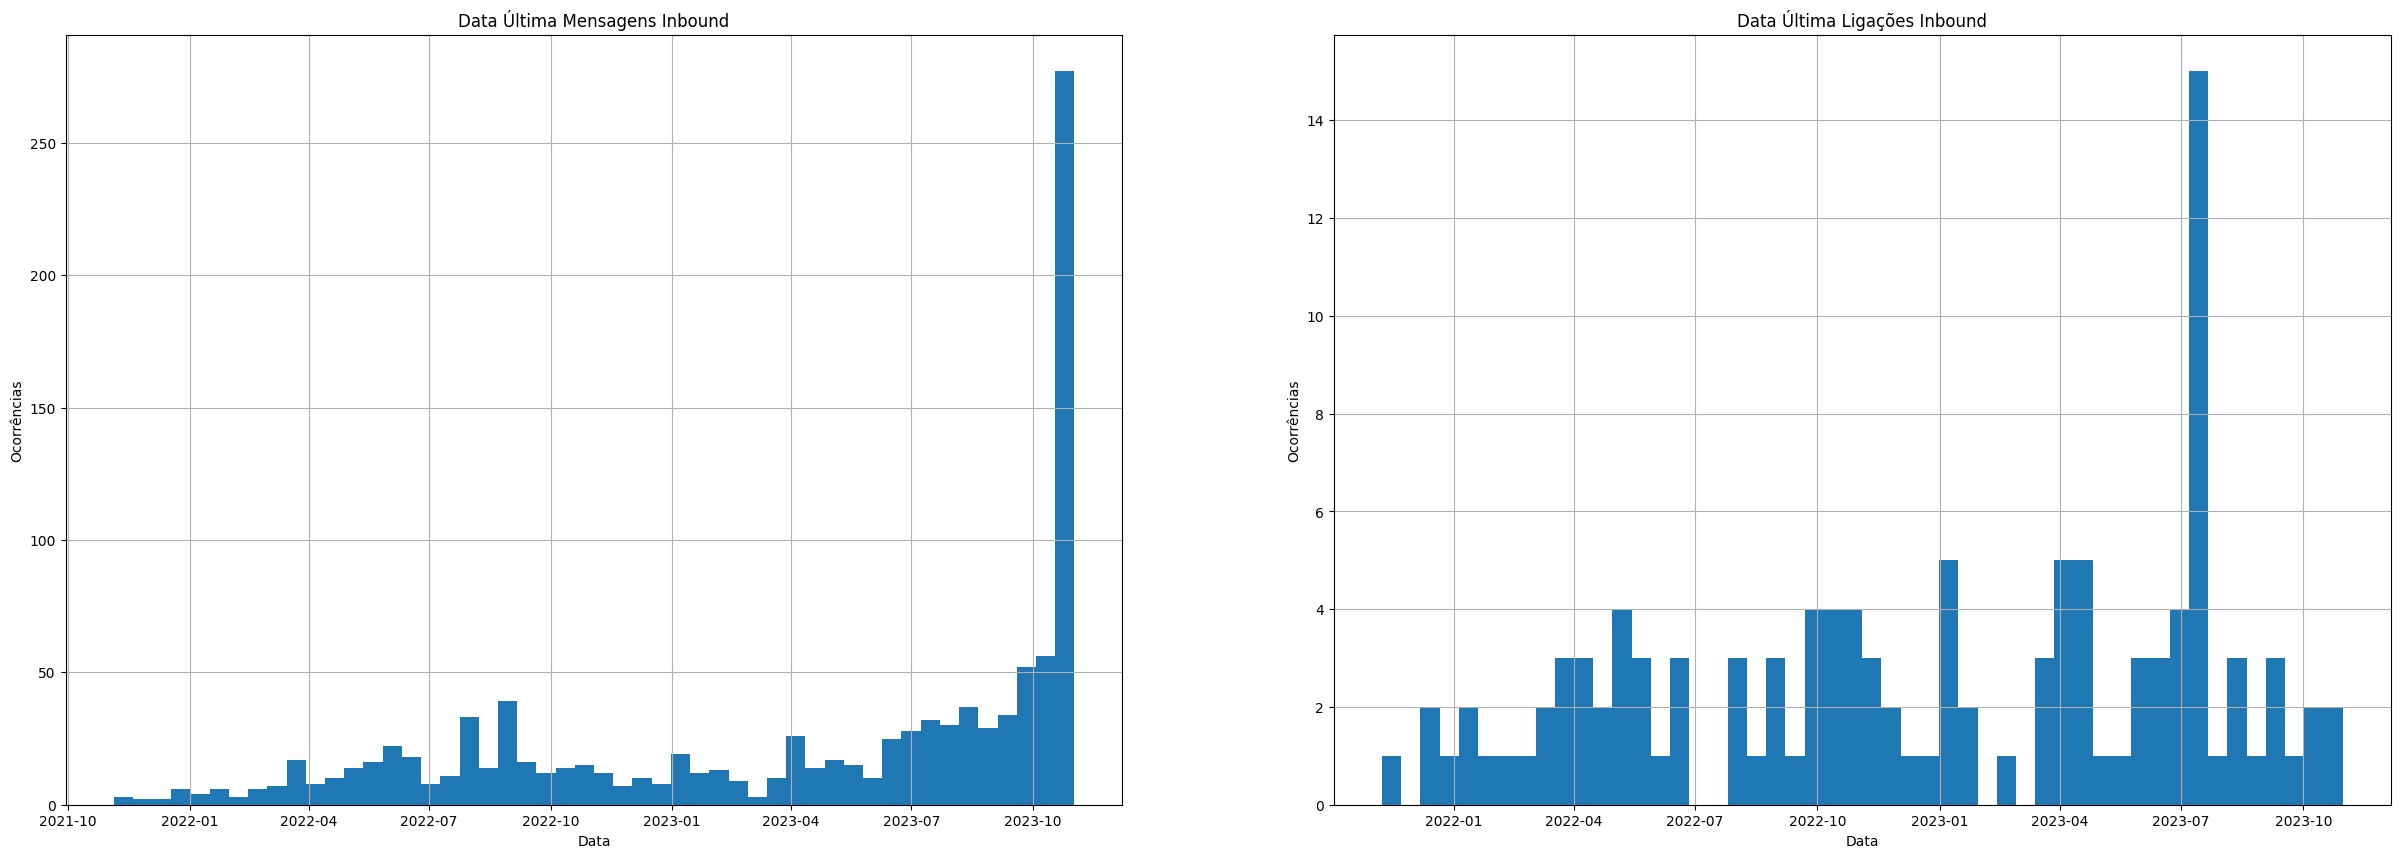

In [557]:
fig, ax = plt.subplots(1, 2, figsize=(30, 10))

# plot 1
df['Data Última Mensagens Inbound'].hist(ax=ax[0], bins=50)
ax[0].set_title('Data Última Mensagens Inbound')

# plot 2
df['Data Última Ligações Inbound'].hist(ax=ax[1], bins=50)
ax[1].set_title('Data Última Ligações Inbound')

# xlabel e ylabel
for i in range(2):
    ax[i].set_xlabel('Data')
    ax[i].set_ylabel('Ocorrências')

plt.show()

## Recebe Comunicados?

Indicação se a pessoa recebe comunicados por WhatsApp da equipe de saúde da Ana Health (Opt-out)


In [563]:
df['Recebe Comunicados?'].value_counts()

False    62
Name: Recebe Comunicados?, dtype: int64

## Pontos de Atenção

Informações relevantes sobre a condição de saúde da pessoa, Determinantes Sociais de Saúde e Territorialização


In [564]:
df['Pontos de Atenção'].value_counts()

False    62
Name: Pontos de Atenção, dtype: int64

## id_stage

Identificador do tipo de contratação por assinatura (separada por vírgula): PJ, PF ou Acolimento Desemprego


In [565]:
df['id_stage'].value_counts()

65                                        776
64                                        223
65; 64                                     20
64; 65                                     17
64; 64                                     13
65; 65                                      5
65; 66                                      4
64; 66; 65                                  3
66; 65                                      3
65; 64; 66                                  2
65; 66; 64                                  2
66                                          2
64; 64; 64                                  2
64; 64; 65; 66                              1
65; 64; 64; 64                              1
66; 65; 64                                  1
64; 66                                      1
65; 64; 65                                  1
64; 64; 64; 64                              1
64; 64; 64; 64; 64; 64; 64; 64; 64; 64      1
Name: id_stage, dtype: int64